In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

os.chdir('/home/nosson/Documents/U-M/STATS_503/final_data/x_all')

In [91]:
### Fill in patient data from the individual patient files. Each is filled with summary statistics which give a 
### min, max, mean and slope for all clinical values over the patient's stay. 


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## function to generate slope from list of paired (hr,val) 
def ExtractSlope(hr,val):
    mod=np.polyfit(hr,val,1)
    return mod[0]
patientData=pd.DataFrame()

row = {'ID':int(0),'Age':np.nan,'Duration':np.nan,'Gender':np.nan,'Unit1':np.nan,'Unit2':np.nan,
          'Alkalinephos-Min':np.nan,'Alkalinephos-Max':np.nan,'Alkalinephos-Mean':np.nan,'Alkalinephos-Slope':np.nan,
          'AST-Min':np.nan,'AST-Max':np.nan,'AST-Mean':np.nan,'AST-Slope':np.nan,
          'Bilirubin_total-Min':np.nan,'Bilirubin_total-Max':np.nan,'Bilirubin_total-Mean':np.nan,'Bilirubin_total-Slope':np.nan,
          'BUN-Min':np.nan,'BUN-Max':np.nan,'BUN-Mean':np.nan,'BUN-Slope':np.nan,
          'Calcium-Min':np.nan,'Calcium-Max':np.nan,'Calcium-Mean':np.nan,'Calcium-Slope':np.nan,
          'Creatinine-Min':np.nan,'Creatinine-Max':np.nan,'Creatinine-Mean':np.nan,'Creatinine-Slope':np.nan,
          'DBP-Min':np.nan,'DBP-Max':np.nan,'DBP-Mean':np.nan,'DBP-Slope':np.nan,
          'Glucose-Min':np.nan,'Glucose-Max':np.nan,'Glucose-Mean':np.nan,'Glucose-Slope':np.nan,
          'Hct-Min':np.nan,'Hct-Max':np.nan,'Hct-Mean':np.nan,'Hct-Slope':np.nan,
          'Hgb-Min':np.nan,'Hgb-Max':np.nan,'Hgb-Mean':np.nan,'Hgb-Slope':np.nan,
          'HR-Min':np.nan,'HR-Max':np.nan,'HR-Mean':np.nan,'HR-Slope':np.nan,
          'Magnesium-Min':np.nan,'Magnesium-Max':np.nan,'Magnesium-Mean':np.nan,'Magnesium-Slope':np.nan,
          'MAP-Min':np.nan,'MAP-Max':np.nan,'MAP-Mean':np.nan,'MAP-Slope':np.nan,
          'O2Sat-Min':np.nan,'O2Sat-Max':np.nan,'O2Sat-Mean':np.nan,'O2Sat-Slope':np.nan,
          'Phosphate-Min':np.nan,'Phosphate-Max':np.nan,'Phosphate-Mean':np.nan,'Phosphate-Slope':np.nan,
         'Platelets-Min':np.nan,'Platelets-Max':np.nan,'Platelets-Mean':np.nan,'Platelets-Slope':np.nan,
         'Potassium-Min':np.nan,'Potassium-Max':np.nan,'Potassium-Mean':np.nan,'Potassium-Slope':np.nan,
         'Resp-Min':np.nan,'Resp-Max':np.nan,'Resp-Mean':np.nan,'Resp-Slope':np.nan,
          'SBP-Min':np.nan,'SBP-Max':np.nan,'SBP-Mean':np.nan,'SBP-Slope':np.nan,
          'Temp-Min':np.nan,'Temp-Max':np.nan,'Temp-Mean':np.nan,'Temp-Slope':np.nan,
          'WBC-Min':np.nan,'WBC-Max':np.nan,'WBC-Mean':np.nan,'WBC-Slope':np.nan,
          'EtCO2-Min':np.nan,'EtCO2-Max':np.nan,'EtCO2-Mean':np.nan,'EtCO2-Slope':np.nan,
         'BaseExcess-Min':np.nan,'BaseExcess-Max':np.nan,'BaseExcess-Mean':np.nan,'BaseExcess-Slope':np.nan,
         'HCO3-Min':np.nan,'HCO3-Max':np.nan,'HCO3-Mean':np.nan,'HCO3-Slope':np.nan,'FiO2-Min':np.nan,
         'FiO2-Max':np.nan,'FiO2-Mean':np.nan,'FiO2-Slope':np.nan,'pH-Min':np.nan,'pH-Max':np.nan,
          'pH-Mean':np.nan,'pH-Slope':np.nan,'PaCO2-Min':np.nan,'PaCO2-Max':np.nan,'PaCO2-Mean':np.nan,
          'PaCO2-Slope':np.nan,'SaO2-Min':np.nan,'SaO2-Max':np.nan,'SaO2-Mean':np.nan,'SaO2-Slope':np.nan,
         'Chloride-Min':np.nan,'Chloride-Max':np.nan,'Chloride-Mean':np.nan,'Chloride-Slope':np.nan,
         'Lactate-Min':np.nan,'Lactate-Max':np.nan,'Lactate-Mean':np.nan,'Lactate-Slope':np.nan,
          'Bilirubin_direct-Min':np.nan,'Bilirubin_direct-Max':np.nan,'Bilirubin_direct-Mean':np.nan,
          'Bilirubin_direct-Slope':np.nan,
          'TroponinI-Min':np.nan,'TroponinI-Max':np.nan,'TroponinI-Mean':np.nan,'TroponinI-Slope':np.nan,
          'PTT-Min':np.nan,'PTT-Max':np.nan,'PTT-Mean':np.nan,'PTT-Slope':np.nan,
          'Fibrinogen-Min':np.nan,'Fibrinogen-Max':np.nan,'Fibrinogen-Mean':np.nan,'Fibrinogen-Slope':np.nan,
          }
#patientData=pd.DataFrame(row,index=[0])

#iterate through the files in the directory
for filename in os.listdir():

    newRow=row.copy()
    dt = pd.read_csv(filename)
    
    newRow['ID']=int(dt[dt['Variable']=='ID']['Value'].mode().item())
    newRow['Gender']=int(dt[dt['Variable']=='Gender']['Value'].mode().item())
    newRow['Age']=dt[dt['Variable']=='Age']['Value'].median()
    newRow['Duration']=dt.Hour.max()

    if not (dt[dt.Variable=='Unit1'].empty):
        newRow['Unit1']=int(dt[dt.Variable=='Unit1']['Value'].mode())
    if not (dt[dt.Variable=='Unit2'].empty):
        newRow['Unit2']=int(dt[dt.Variable=='Unit2']['Value'].mode())
    ### for each quantitative variable extract max,min,mean, and slope
    for datum in ['Alkalinephos','AST','Bilirubin_total','BUN','Calcium','Creatinine','DBP','Glucose','Hct','Hgb',
             'HR','Magnesium','MAP','O2Sat','Phosphate','Platelets','Potassium','Resp','SBP','Temp','WBC','EtCO2',
             'BaseExcess','HCO3','FiO2','pH','PaCO2','SaO2','Chloride','Lactate','Bilirubin_direct','TroponinI',
             'PTT','Fibrinogen']:
        if not (dt[dt.Variable==datum].empty):
            newRow[datum+'-Min']=dt[dt.Variable==datum]['Value'].min()
            newRow[datum+'-Max']=dt[dt.Variable==datum]['Value'].max()
            newRow[datum+'-Mean']=dt[dt.Variable==datum]['Value'].mean()
            hours = dt[dt.Variable==datum]['Hour']
            vals = dt[dt.Variable==datum]['Value']
            Slope = ExtractSlope(hours,vals)
            newRow[datum+'-Slope']= Slope;
    print(newRow['ID'])
    ### add all patient data as a row to dataframe
    patientData=patientData.append(newRow,ignore_index=True)
patientData['ID']=patientData['ID'].astype(int)

18919
14861
6516
2057
185
8608
7907
3823
20675
15481
17836
16268
502
14494
12739
18046
9679
5753
9682
16928
17454
21480
182
804
10289
2806
12714
7732
1906
18619
1032
923
10759
12187
13471
12759
16738
9653
2008
443
7110
17190
13875
18563
17610
16602
11467
21212
8732
5173
2178
2880
4574
3692
9262
10300
17397
21026
49
943
20398
13113
10295
17981
8444
8108
12128
15402
6690
3093
9326
4576
4287
18468
1447
16989
21018
1833
9317
11592
3326
7352
20486
17552
1150
5266
17030
21140
2774
15586
19228
21248
6408
15905
9945
15294
6323
7242
16843
553
834
19906
15507
4941
20164
10524
7918
21173
20264
20425
18112
4074
2410
15494
16417
9144
767
18946
9696
6523
4604
14796
12746
3241
1843
6210
1123
57
1040
16458
4634
780
20231
11485
17135
10774
19914
9283
6205
12073
8912
15488
4496
6260
5478
4166
15399
9197
3901
1289
5094
505
15792
5294
6950
7521
18633
11590
3622
18209
21001
8429
4879
2152
2508
4106
14863
4250
19234
397
814
16889
19542
18341
19748
6044
15422
14555
14072
17929
5782
21265
7391
17640
19752
164

In [105]:
### sort by ID and save to file
patientData=patientData.sort_values(by='ID')
patientData=patientData.reset_index(drop=True)
patientData.to_csv('patientData.csv')



In [106]:
### separate the data - patients with known outcomes into `trainSet`, those without into `testSet`
### merge the results into the trainSet
results = pd.read_csv('../train_outcome.csv')
testList=pd.read_csv('../test_nolabel.csv')
testList=testList['ID'].values
testSet=patientData[patientData['ID'].isin(testList)]
trainSet=patientData[~patientData['ID'].isin(testList)]
trainSet = pd.merge(trainSet,results,on='ID')


In [10]:
## To read from saved file - after file is already generated, run this cell to load the data
patientData=pd.read_csv('patientData.csv')
patientData=patientData.drop(patientData.columns[0],axis=1)
results = pd.read_csv('../train_outcome.csv')
testList=pd.read_csv('../test_nolabel.csv')
testList=testList['ID'].values
testSet=patientData[patientData['ID'].isin(testList)]
trainSet=patientData[~patientData['ID'].isin(testList)]
trainSet = pd.merge(trainSet,results,on='ID')

In [11]:
trainSet.head()

,ID,Age,Duration,Gender,Unit1,Unit2,Alkalinephos-Min,Alkalinephos-Max,Alkalinephos-Mean,Alkalinephos-Slope,...,TroponinI-Slope,PTT-Min,PTT-Max,PTT-Mean,PTT-Slope,Fibrinogen-Min,Fibrinogen-Max,Fibrinogen-Mean,Fibrinogen-Slope,Outcome
0,2,66.67,24.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,3,79.74,58.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,23.81,52.77,38.090000,-0.207310,161.19,267.01,214.1,-17.636667,0
2,4,35.18,38.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,...,1.296296e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,5,60.74,134.0,1.0,NaN,NaN,58.00,58.00,58.00,4.833333,...,-1.006115e-20,29.58,29.58,29.580000,2.465000,NaN,NaN,NaN,NaN,1
4,6,77.32,51.0,0.0,1.0,0.0,70.18,70.18,70.18,1.253214,...,NaN,33.73,48.15,40.016667,-0.554632,611.00,611.00,611.0,101.833333,0


In [12]:
### Split the `trainSet` into 2 parts. 70% is used to train a model which is tested on the remaining 30%
### Then, the model which seems optimal is trained on the entire data and applied to the patients with 
### unknown outcome. 
### So, the `patient_test` set is the part of the patient data with known outcomes which is left to test the model.

from sklearn.model_selection import train_test_split

patient_train, patient_test = train_test_split(trainSet, test_size = 0.3)

### Split predictors from response

X_train = patient_train.drop(['Outcome'], axis=1)
y_train = patient_train['Outcome']
X_test = patient_test.drop(['Outcome'], axis=1)
y_test = patient_test['Outcome']

### Use iterative imputation to fill in missing values. 

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=82)
X_train_mice = imp.fit_transform(X_train)
X_test_mice = imp.fit_transform(X_test)



In [20]:
## Use cross-validation to choose the optimal parameters using adaBoost. 

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

tree_results1 = list()
tree_results2 = list()

# define number of trees to consider
n_trees = [50, 100, 500]
for n in n_trees:
    model = AdaBoostClassifier(n_estimators=n)
    
    # evaluate a given model using cross-validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=11)

    # evaluate the model and collect the results
    scores1 = cross_val_score(model, X_train_mice, y_train, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(model, X_train_mice, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    tree_results1.append(scores1)
    tree_results2.append(scores2)
    


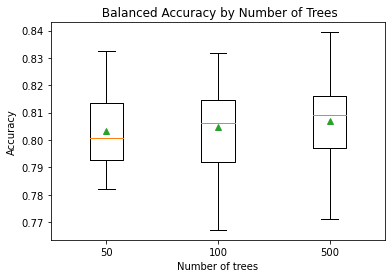

In [21]:
plt.boxplot(tree_results1, labels=n_trees, showmeans=True)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title(' Balanced Accuracy by Number of Trees')
plt.show()

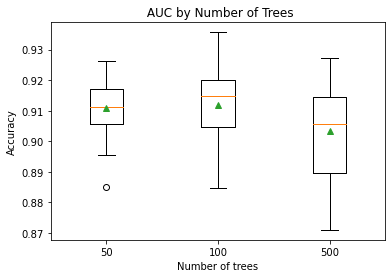

In [22]:
plt.boxplot(tree_results2, labels=n_trees, showmeans=True)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title(' AUC by Number of Trees')
plt.show()

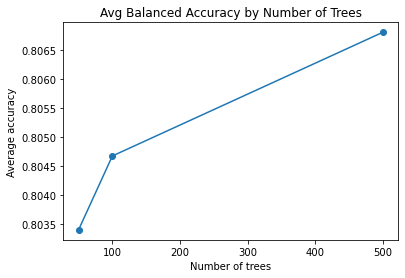

In [23]:
avg_acc = np.mean(tree_results1, axis=1)
plt.plot(n_trees, avg_acc, marker='o')
plt.xlabel('Number of trees')
plt.ylabel('Average accuracy')
plt.title('Avg Balanced Accuracy by Number of Trees')
plt.show()

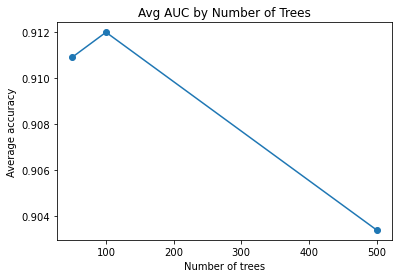

In [24]:
avg_acc = np.mean(tree_results2, axis=1)
plt.plot(n_trees, avg_acc, marker='o')
plt.xlabel('Number of trees')
plt.ylabel('Average accuracy')
plt.title('Avg AUC by Number of Trees')
plt.show()

As shown, the optimal balance between `balanced accuracy` and `AUC` is with 100 trees. Now, to use cross-validation to get the optimal depth.

In [25]:
from sklearn.tree import DecisionTreeClassifier
depth_results1 = list()
depth_results2 = list()
n_depth = np.arange(1, 15)

for depth in n_depth:
    # define base model
    base = DecisionTreeClassifier(max_depth=depth)
    # define ensemble model
    model = AdaBoostClassifier(base_estimator=base, n_estimators=100)
    
    # evaluate a given model using cross-validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores1 = cross_val_score(model, X_train_mice, y_train, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(model, X_train_mice, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    depth_results1.append(scores1)
    depth_results2.append(scores2)

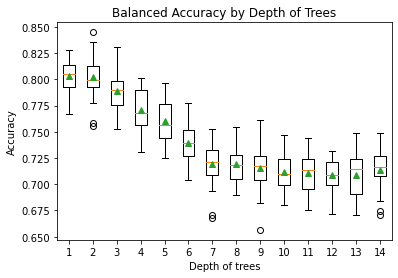

In [26]:
plt.boxplot(depth_results1, labels=n_depth, showmeans=True)
plt.xlabel('Depth of trees')
plt.ylabel('Accuracy')
plt.title('Balanced Accuracy by Depth of Trees')
plt.show()

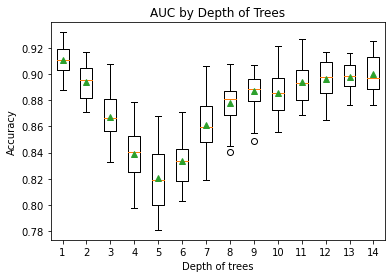

In [27]:
plt.boxplot(depth_results2, labels=n_depth, showmeans=True)
plt.xlabel('Depth of trees')
plt.ylabel('Accuracy')
plt.title('AUC by Depth of Trees')
plt.show()

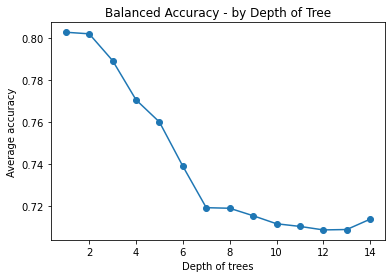

In [28]:
avg_acc = np.mean(depth_results1, axis=1)
plt.plot(n_depth, avg_acc, marker='o')
plt.xlabel('Depth of trees')
plt.ylabel('Average accuracy')
plt.title('Balanced Accuracy - by Depth of Tree')
plt.show()

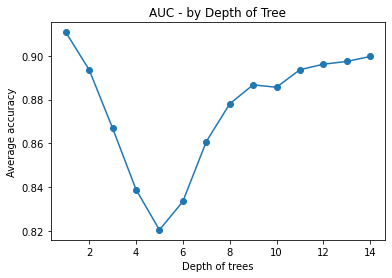

In [29]:
avg_acc = np.mean(depth_results2, axis=1)
plt.plot(n_depth, avg_acc, marker='o')
plt.xlabel('Depth of trees')
plt.ylabel('Average accuracy')
plt.title('AUC - by Depth of Tree')
plt.show()

As shown, the best balance of `AUC` and `balanced accuracy` is at a depth of 2. Now to optimize the learning rate:


In [37]:
rates = [0.01, 0.1, 0.6, 1.4, 1.8]

depth_results1 = list()
depth_results2 = list()
rates = [.01,.1,.6,1.4,1.8]

for rate in rates:
    # define base model
    base = DecisionTreeClassifier(max_depth=2)
    # define ensemble model
    model = AdaBoostClassifier(base_estimator=base, n_estimators=100,learning_rate=rate)
    
    # evaluate a given model using cross-validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores1 = cross_val_score(model, X_train_mice, y_train, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(model, X_train_mice, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    depth_results1.append(scores1)
    depth_results2.append(scores2)
    print(rate)

0.01
0.1
0.6
1.4
1.8


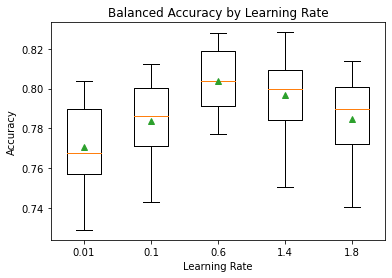

In [38]:
plt.boxplot(depth_results1, labels=rates, showmeans=True)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Balanced Accuracy by Learning Rate')
plt.show()

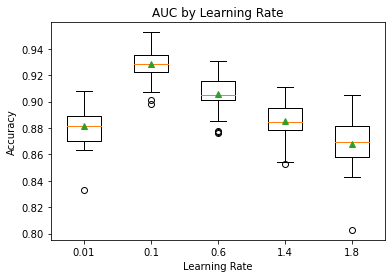

In [39]:
plt.boxplot(depth_results2, labels=rates, showmeans=True)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('AUC by Learning Rate')
plt.show()

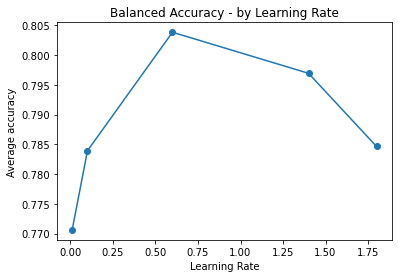

In [40]:
avg_acc = np.mean(depth_results1, axis=1)
plt.plot(rates, avg_acc, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Average accuracy')
plt.title('Balanced Accuracy - by Learning Rate')
plt.show()

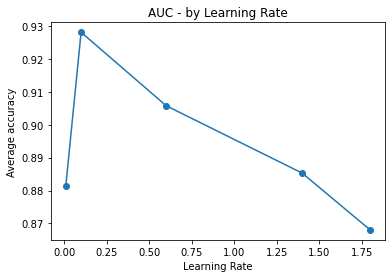

In [41]:
avg_acc = np.mean(depth_results2, axis=1)
plt.plot(rates, avg_acc, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Average accuracy')
plt.title('AUC - by Learning Rate')
plt.show()

In [31]:
#Now fit the optimized model to the full training set
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# define base model
base = DecisionTreeClassifier(max_depth=2)
# define ensemble model
model = AdaBoostClassifier(base_estimator=base, n_estimators=100,learning_rate=.6)
model.fit(X_train_mice, y_train) 
   
    
    

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.6, n_estimators=100)

In [32]:
y_pred = model.predict(X_test_mice)
y_pred_prob=model.predict_proba(X_test_mice)[:,1]

0.875611544473372
0.8983666217937891
0.930237676056338


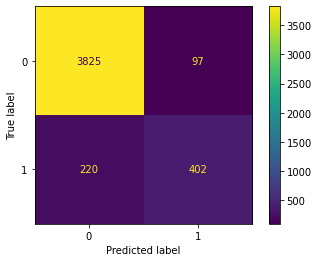

In [33]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

print (balanced_accuracy_score(y_pred,y_test))
print (roc_auc_score(y_test,y_pred_prob))
print (np.mean(y_pred==y_test))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_ )
cm_display.plot(); 


Now, to make the predictions for the data for which we don't know the outcome, we do the following:

- Retrain the model using all data for which the outcome is known.
- Impute the missing values among the predictors for the set of `unknown outcome`.
- Predict, for the `unknown outcome` data:
    - The probability of developing sepsis $\in (0,1)$
    - The predicted outcome $\in \{0,1\}$
- Save the predictions to a file.

In [36]:
X_train = trainSet.drop(['Outcome'], axis=1)
y_train = trainSet['Outcome']

imp = IterativeImputer(max_iter=10, random_state=82)
X_train_mice = imp.fit_transform(X_train)
X_test_mice = imp.fit_transform(X_test)

from sklearn.tree import DecisionTreeClassifier
# define base model
base = DecisionTreeClassifier(max_depth=2)
# define ensemble model
model = AdaBoostClassifier(base_estimator=base, n_estimators=100,learning_rate=.6)
model.fit(X_train_mice, y_train) 

/home/nosson/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.6, n_estimators=100)

In [38]:
imp = IterativeImputer(max_iter=10, random_state=82)
X_test = imp.fit_transform(testSet)

In [39]:
predicted_outcomes = model.predict(X_test)

In [40]:
predicted_probability = model.predict_proba(X_test)

In [42]:
### read the test_nolabel file with the id numbers of patients
test_nolabel =pd.read_csv('../test_nolabel.csv')
test_nolabel.head()

,ID,Outcome,Score
0,1,NaN,NaN
1,8,NaN,NaN
2,9,NaN,NaN
3,10,NaN,NaN
4,11,NaN,NaN


In [43]:
### Attach predicted outcomes and probabilities to the file with patient id numbers
test_nolabel['Outcome'] = predicted_outcomes
test_nolabel['Score'] = predicted_probability[:,1]
test_nolabel.head()

test_nolabel.to_csv('Predicted_outcomes.csv')
